# EDA
## Feature Engineering
### Types Of Missing Data:
#### 1. Missing Completely at Random(MCAR)
A variable is missing completely at random (MCAR) if missing values on a given variable (Y) don't have a releationship with other variables in a given data set or with the variable(Y) itself. in other words

###### when data is MCAR, there is no releationship between the data missing and any values, and there is no parcticular reason for the missing values.

In [1]:
import pandas as pd

In [4]:
#Read titanic training dataset
df = pd.read_csv(r'C:\Users\LENOVO\Desktop\Feature Engineering\titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
#checking number of Null values in Training Data set
df.isnull().sum()
#After the Titanic's accident has happened, age's and cabin's null values don't have any co-relation. Hence, MCAR


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# "age" and "cabin" may be co-releated
# but lets see about "embarked"
df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [9]:
df['Embarked'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Embarked, Length: 891, dtype: bool

In [10]:
df[df['Embarked'].isnull()]
#perfect example of MCAR (missing completely at random)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


## 2) Missing not at random (MNAR) or Systematic Missing Values
##### data that is neither MNAR nor MCAR
##### (i.e. the value of the variable that's missing is releated to the reason it's missing

In [12]:
df['Cabin'].isnull()

0       True
1      False
2       True
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Name: Cabin, Length: 891, dtype: bool

In [13]:
import numpy as np
df['Cabin_null'] = np.where(df['Cabin'].isnull(),1,0) 
# Null, NAN values are replaced by 1 in new column "Cabin_null"
df['Cabin_null']

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    1
889    0
890    1
Name: Cabin_null, Length: 891, dtype: int32

In [14]:
df.columns
#new column "Cabin_null" is generated

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_null'],
      dtype='object')

In [15]:
#find the percentage of null values = 659/850 %
df['Cabin_null'].mean()
#mean = sum/total

0.7710437710437711

In [16]:
#comparing "Cabin_null" vs Survived
df.groupby(['Survived'])['Cabin_null'].mean()
#0 ~ Not Survived ---> 87% have missing values
#0 ~ Survived ---> 60% have missing values.
# its obvious that,
# missing values for 'not survived' people should be greater than missing values for "Survived" people

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

## Exploratory Data Analysis:
### Techniques of Handling Missing Values
#### 1) Mean / Median / Mode Imputation

when should we apply? --> Mean/Median/Mode Imputation, has the assumption that the data are missing completely at random(MCAR) --> It is solved by replacing the NAN with the most frequent occurence of the variables

In [17]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [18]:
# read 3 columns from Titanic dataset
df = pd.read_csv(r'C:\Users\LENOVO\Desktop\Feature Engineering\titanic_train.csv', usecols =['Age','Fare','Survived'])

In [19]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [20]:
#percentage of missing values in each category
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [22]:
#create a function which will impute NAN Values
def impute_nan(df, variable,median):
    # df,variable,median ~ are parameters
    df[variable+"_median"] = df[variable].fillna(median) #filling NAN values with median
median = df.Age.median()
median #median of age column

28.0

In [24]:
impute_nan(df, 'Age', median) #applying the new function "impute_nan" to previous dataset of (age, fare, survived)
df
# observe the NAN value in Age column is replaced with median = 28.0

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
...,...,...,...,...
886,0,27.0,13.0000,27.0
887,1,19.0,30.0000,19.0
888,0,NaN,23.4500,28.0
889,1,26.0,30.0000,26.0


In [25]:
print(df['Age'].std()) #Standard deviation of the original column "age"
print(df['Age_median'].std()) #Std deviation of the new coolumn "Age_median"

14.526497332334044
13.019696550973194


In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

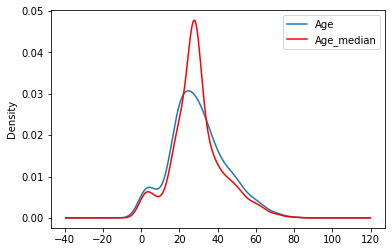

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111) #defining axes
df['Age'].plot(kind='kde', ax=ax) #plotted 1st, default colored, graph
#kde ~ kernel density estimator
df.Age_median.plot(kind='kde', ax=ax, color='red') #plotted 2nd, red colored, graph
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best') #Naming / Labeling the multi plots

### 2) Random Sample Imputation
###### Aim: replacing the NaN values with Random Observation
###### Applied for the data of type: Missing Completely at Random(MCAR)

In [2]:
import pandas as pd
df = pd.read_csv(r'C:\Users\LENOVO\Desktop\Feature Engineering\titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df = pd.read_csv(r'C:\Users\LENOVO\Desktop\Feature Engineering\titanic_train.csv', usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().sum()  #finding Number of null values in neach columns

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df.isnull().mean() #finding percentage of null values in each columns

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [6]:
#read 'Age' column
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [7]:
df['Age'].dropna()  #Dropping NaN values in "age" column

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

In [9]:
df['Age'].isnull().sum()  #measuring number of NAN / Null values in 'Age' column

177

In [11]:
df['Age'].dropna().sample()
# choosing random sample from the Nan-Null values in the 'age' column
# o/p is dynamic i.e - changes every time

203    45.5
Name: Age, dtype: float64

In [12]:
df['Age'].dropna().sample(df['Age'].isnull().sum()) #intubating Random Values at previous Nan places
#but, #o/p is changing after each execution

238    19.0
479     2.0
398    23.0
627    21.0
361    29.0
       ... 
867    31.0
97     23.0
514    24.0
558    39.0
666    25.0
Name: Age, Length: 177, dtype: float64

In [13]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0) #intubating Random Values at previous Nan places
#but, #o/p is NoT changing after each execution

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [14]:
#create a function which will impute NAN Values
def impute_nan(df, variable,median):
    # df,variable,median ~ are parameters
    df[variable+"_median"] = df[variable].fillna(median) #filling NAN values with median
median = df.Age.median()
#median #median of age column
impute_nan(df,'Age',median)
df

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
...,...,...,...,...
886,0,27.0,13.0000,27.0
887,1,19.0,30.0000,19.0
888,0,NaN,23.4500,28.0
889,1,26.0,30.0000,26.0


In [15]:
def impute_nan(df,variable,median):
    df[variable+"_median"] = df[variable].fillna(median)
    df[variable+"_random"] = df[variable]
#replace 'age' with 'variable' in previous command: df['age'].dropna().sample(df['age'].isnull().sum(),random_state=0) 
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0) 

In [16]:
df[df['Age'].isnull()].index #Pick Up Index of all Nan values in Age column

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [17]:
def impute_nan(df,variable,median):
    df[variable+"_median"] = df[variable].fillna(median)
    df[variable+"_random"] = df[variable]
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0) 
#pandas need to have same index in order to merge the dataset
#replace 'age' with 'variable' in previous command: df[df['age'].isnull()].index
    random_sample.index = df[df[variable].isnull()].index #Pick Up Index of all Nan values in any Variable column

In [18]:
def impute_nan(df,variable,median):
    df[variable+"_median"] = df[variable].fillna(median)
    df[variable+"_random"] = df[variable]
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random'] = random_sample # Replacing NAN values with Random Sample

In [19]:
median = df.Age.median()
median

28.0

In [20]:
impute_nan(df,'Age',median)
df #displaying both "age_median" and "age_random"
#Ta-da - finally Magic Happens :D

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,NaN,23.4500,28.0,15.0
889,1,26.0,30.0000,26.0,26.0


In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

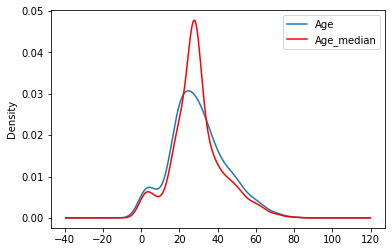

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111) # defining axes
df['Age'].plot(kind='kde', ax=ax) #plotted 1st, default colored, graph
# 'age_median' is replaced with age_random
df.Age_median.plot(kind='kde', ax=ax, color = 'red') #plotted age_median, red colored, graph
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best') #Naming / labeling the multi plots

# "age" and "age_median" do NOT have similar data distribution

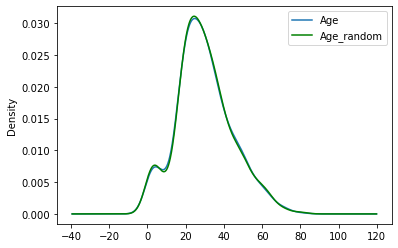

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111) # defining axes
df['Age'].plot(kind='kde', ax=ax) #plotted 1st, default colored, graph
# 'age_median' is replaced with age_random
df.Age_random.plot(kind='kde', ax=ax, color = 'green') #plotted age_random, GREEN colored, graph
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best') #Naming / labeling the multi plots

# "age" and "age_random" have almost similar data distribution

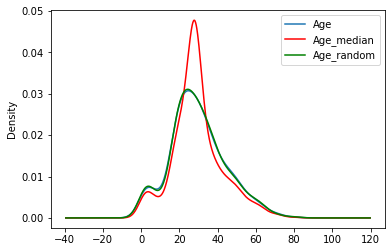

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111) # defining axes
df['Age'].plot(kind='kde', ax=ax) #plotted 1st, default colored, graph
# 'age_median' is replaced with age_random
df.Age_median.plot(kind='kde', ax=ax, color = 'red') #plotted age_median, RED colored, graph
df.Age_random.plot(kind='kde', ax=ax, color = 'green') #plotted age_random, GREEN colored, graph
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best') #Naming / labeling the multi plots

# "age" and "age_random" have almost similar data distribution

#### in this situation,
Technique 2) Random Sample Imputation

performed better than

Technique 1) Mean / Median / Mode Imputation

#### ADVANTAGE
of Technique 2) Random Sample Imputation

1) Easy to Implement
2) Less distortion in variance wrt "Technique 1) Mean / Median / Mode Imputation"
#### Disadvantage
1) In every situation , randomness need not give good result

### 3. Capturing NaN Values With a New Feature
This technique works well, when data is Missing Not at Random(MNAR)

In [26]:
import pandas as pd
df = pd.read_csv(r'C:\Users\LENOVO\Desktop\Feature Engineering\titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
#focusing on only 3 columns
df = pd.read_csv(r'C:\Users\LENOVO\Desktop\Feature Engineering\titanic_train.csv', usecols=['Age', 'Fare', 'Survived'])
df.head()  #reading onlt top 3 rows

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [28]:
import numpy as np
df['Age_NaN'] = np.where(df['Age'].isnull(),1,0) #if value is null then insert 1 or else zero '0'
df.head(25)

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


### Advantages

1) Easy to implement

2) Captures the importance of missing values by placing 1 at NaN

In [32]:
df1 = df.Age.median()
int(df1)

28

In [33]:
df['Age'].fillna(int(df1))

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [35]:
df['Age'].fillna(int(df1),inplace=True) #permanent replacement of Nan value with Median
df.head(20) # 1 is tell the ML model there was Nan value in that row of Age column

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


### Dis-Advantage
1) Creating One Additional feature for each Feature with Nan Value, leading to Curse of dimensionality

Imagine 200 new / extra features for 200 old features :O

## 4.End of Distribution Imputation

###### If there is a suspicion that the missing value is not at random then capturing that information is important

In this scenario, one would want to replace missing data with values that are at thetails of the distribution of the variable

In [37]:
import pandas as pd
df = pd.read_csv(r'C:\Users\LENOVO\Desktop\Feature Engineering\titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [39]:
#focusing on top 3 rows
df = pd.read_csv(r'C:\Users\LENOVO\Desktop\Feature Engineering\titanic_train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

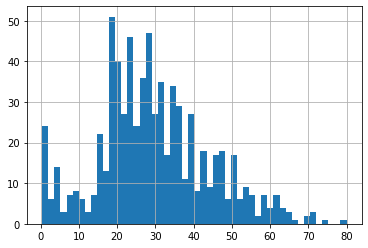

In [40]:
# plotting Histogram
df.Age.hist(bins=50)
# several Outliers on Right hand side

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

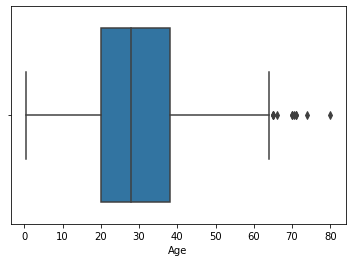

In [41]:
# to check outliers by plotting Boxplot
import seaborn as sns
sns.boxplot('Age', data=df)
# showing 0, 25,50,75,100 percentile

In [43]:
df.Age.mean() #found mean = central value

29.69911764705882

In [44]:
#trying to pickup data after 3 std.deviation (mean+ 3 sigma)
extreme = df.Age.mean()+3*df.Age.std()
extreme

73.27860964406095

In [45]:
# the dots after right vertical line
# are called as Outliers
# here, we dont have Outliers on Left Side

In [46]:
# if you have doubts or need further clarification about statistics concepts
# 1) Normal distribution
# 2) Outliers
# 3) Box plot
# You may contact me

In [48]:
#create a function which will impute NAN values
def impute_nan(df,variable,median,extreme):
# df,variable,median and extreme ~ are parameters
    df[variable+"_end_distribution"] = df[variable].fillna(extreme) # filling NAN values with 'extreme' in'age_end_distribution' column
    df[variable].fillna(median,inplace=True)  # replacing NAN values with 'median' in the 'age' column

In [49]:
median = df.Age.median()    
median # extracting Median of the database

28.0

In [50]:
impute_nan(df,'Age',median,extreme)
df.head(25)

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


<AxesSubplot:>

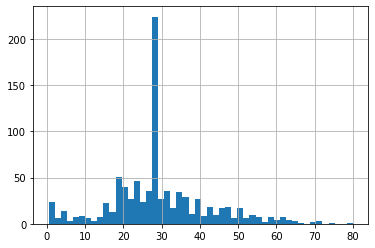

In [51]:
#plot histogram for 'age' column
df['Age'].hist(bins=50)

<AxesSubplot:>

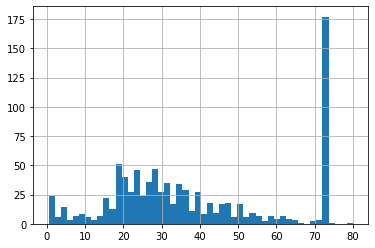

In [52]:
#plot histogram for 'age_end_distribution' column
df['Age_end_distribution'].hist(bins=50)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

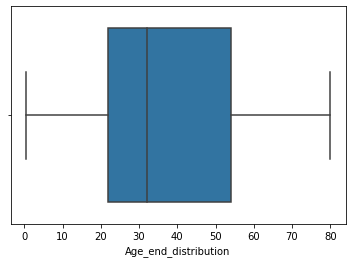

In [53]:
sns.boxplot('Age_end_distribution', data=df)
#cant see any outliers in new boxplot
#but there were some outliers in "age"s histogram on right hand side

### Advantages
1) Easy to implement

2) Captures the importance of missingness if there is one

### Dis-Advantage
1) Distorts the original distribution of the variable

2) If missingness is not essential, it may mask the predictive power of the original variable by distorting its distribution

3) If the number of NaN values is significant, it will mask true outliers in the distribution

4) If the number of NaN values is small, the replaced NaN may be considered an outlier and pre-processed in a subsequent step of feature engineering

## Arbitrary Value Imputation
##### Aim: Replace NaN value with Arbitary value

In [55]:
import pandas as pd
df = pd.read_csv(r'C:\Users\LENOVO\Desktop\Feature Engineering\titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [57]:
#focusing on only 3 columns
df = pd.read_csv(r'C:\Users\LENOVO\Desktop\Feature Engineering\titanic_train.csv', usecols = ['Age', 'Fare','Survived'])
df.head(25)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583
6,0,54.0,51.8625
7,0,2.0,21.0750
8,1,27.0,11.1333
9,1,14.0,30.0708


<AxesSubplot:>

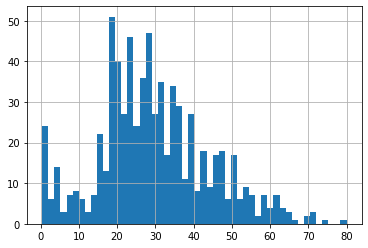

In [58]:
df['Age'].hist(bins=50)
#in the histrogram, the range is 0 to 80

In [60]:
# so, the data is in between 0 and 100
# Arbitary value should NoT be more common
# or least Outliers is preferred

In [61]:
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0) # replacing NaN value with 0 ~ least outlier
    df[variable+'_hundred']=df[variable].fillna(100) # replacing NaN value with 100 ~ atmost outlier
    
impute_nan(df,'Age')
df.head(25)

,Survived,Age,Fare,Age_zero,Age_hundred
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
5,0,NaN,8.4583,0.0,100.0
6,0,54.0,51.8625,54.0,54.0
7,0,2.0,21.0750,2.0,2.0
8,1,27.0,11.1333,27.0,27.0
9,1,14.0,30.0708,14.0,14.0


<AxesSubplot:>

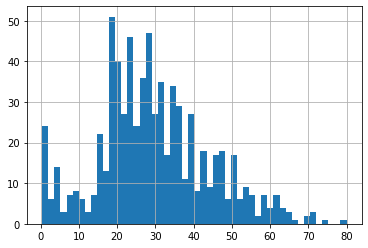

In [62]:
df['Age'].hist(bins=50)
# in the historgram, the range is 0 to 80

In [59]:
#Arbitary value should NOT be more common
# or least outlier is preferred

### Advantage
1) Easy to implement

2) Captures the importance of missingness if there is one

### Disadvantage
1) Disorts the original distribution of the variable

2) If missingness is not essential, it may mask the predictive power of the original variable by distortion

3) Hard to decide which value to use